# Deep Learning with Keras and Tensorflow

## Getting Prepared

Download and extract the dataset

In [1]:
!tar xvf eth-80.tar.gz

x eth-80/
x eth-80/val_set/
x eth-80/val_set/apple/
x eth-80/val_set/apple/apple10-035-225.png
x eth-80/val_set/apple/apple10-068-000.png
x eth-80/val_set/apple/apple10-066-153.png
x eth-80/val_set/apple/apple10-022-270.png
x eth-80/val_set/apple/apple10-022-090.png
x eth-80/val_set/apple/apple10-090-135.png
x eth-80/val_set/apple/apple10-090-068.png
x eth-80/val_set/apple/apple10-090-270.png
x eth-80/val_set/apple/apple10-066-207.png
x eth-80/val_set/apple/apple10-066-243.png
x eth-80/val_set/apple/apple10-090-090.png
x eth-80/val_set/apple/apple10-066-027.png
x eth-80/val_set/apple/apple10-068-270.png
x eth-80/val_set/apple/apple10-090-338.png
x eth-80/val_set/apple/apple10-035-045.png
x eth-80/val_set/apple/apple10-090-045.png
x eth-80/val_set/apple/apple10-035-135.png
x eth-80/val_set/apple/apple10-022-000.png
x eth-80/val_set/apple/apple10-035-315.png
x eth-80/val_set/apple/apple10-045-090.png
x eth-80/val_set/apple/apple10-066-117.png
x eth-80/val_set/apple/apple10-022-180.png
x 

Verify that the data is there

In [4]:
from PIL import Image
from IPython.display import display

In [5]:
im = Image.open('eth-80/train_set/car/car1/car1-066-153.png')

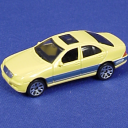

In [10]:
display(im)

In [11]:
import numpy as np
image_arr = np.array(im)
image_arr.shape

(128, 128, 3)

## Module import and variable initialization


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [12]:
# dimensions of our images.
img_width, img_height = 128, 128

In [13]:
train_data_dir = 'eth-80/train_set'
validation_data_dir = 'eth-80/val_set'
nb_train_samples = 2952
nb_validation_samples = 328
epochs = 50
batch_size = 32

## Define the CNN model

In [14]:
#New Tensorflow model
input_shape = (img_width, img_height, 3)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu',input_shape=input_shape))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))


d2 = tf.keras.layers.Dense(64,activation='relu')
model.add(d2)

model.add(tf.keras.layers.Dropout(0.5))
d3 =  tf.keras.layers.Dense(8,activation='softmax')
model.add(d3)




c:\Users\DASUN SRI NETHMAL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)



In [16]:
weights = d3.get_weights()
weights[1].shape

(8,)

## Prepare data feeders

In [17]:
# this is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [18]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2952 images belonging to 8 classes.
Found 328 images belonging to 8 classes.


## Test the data feeders

In [19]:
datum = next(train_generator)
image_batch, label_batch = datum
image_batch.shape
k = 3
image = image_batch[k, ...]
label = label_batch[k, ...]

label

array([0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

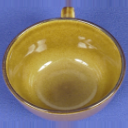

In [20]:
display(Image.fromarray((image * 255).astype(np.uint8)))

In [21]:
image_batch.shape

(32, 128, 128, 3)

In [28]:
!pip install tensorboard


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import datetime

# Load TensorBoard extension (only for Jupyter)
# %reload_ext tensorboard  # Uncomment this line if you're in a Jupyter notebook

# Set up logging directory
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Fit the model

In [35]:
# tbc = TensorBoardColab()
model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[tensorboard_callback]
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9674 - loss: 0.0840 - val_accuracy: 0.7469 - val_loss: 1.1599
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 0.7719 - val_loss: 0.7349
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - accuracy: 0.9732 - loss: 0.0980 - val_accuracy: 0.7375 - val_loss: 1.0060
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9688 - loss: 0.0510 - val_accuracy: 0.7469 - val_loss: 0.8015
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.9722 - loss: 0.0934 - val_accuracy: 0.7437 - val_loss: 0.9825
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.7531 - val_loss: 1.0025
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.9725 - loss: 0.0695 - val_accuracy: 0.8313 - val_loss: 0.4406
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 0.8281

In [42]:
!kill 28524

'kill' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
%tensorboard --logdir logs/fit --port 6007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Save the weights

In [54]:
model.save_weights('saved_weights.h5')

In [55]:
# model.load_weights('source_file.h5')

## Make predictions with the trained CNN!

In [56]:
im = Image.open('eth-80/val_set/horse/horse10-066-117.png')

In [57]:
img = np.array(im) / 255.

In [58]:
img.shape

(128, 128, 3)

In [59]:
img = img[np.newaxis, ...]

In [60]:
img.shape

(1, 128, 128, 3)

In [61]:
out = model.predict_on_batch(img)

In [62]:
out


array([[7.8668810e-10, 5.9013041e-07, 5.0280739e-02, 1.2377291e-08,
        2.9637240e-02, 9.2008144e-01, 6.7700863e-09, 2.3100547e-12]],
      dtype=float32)

In [63]:
np.sum(out)

1.0

In [64]:
np.argmax(out)

5